In [3]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import logging

import anndata


In [4]:
sc.settings.set_figure_params(dpi=80)

In [8]:
sc.settings.verbosity = 3
# sc.logging.print_versions()

In [6]:
from matplotlib import colors
# color_map
colors2 = plt.cm.Reds(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

In [ ]:
adata = sc.read("../data/merged_post_gene_filt_FINAL.h5ad") # read merged data for v3

 - remove 7.5 epiblast cluster

In [6]:
adata = adata[adata.obs['Cluster']!='E7.5: 13',:]

In [7]:
adata.shape

(76894, 21906)

In [8]:
curated_annotation = []

for entry in adata.obs['CellType']:
    curated_annotation.append(entry.split(':')[-1])


cnt = 0
for entry in adata.obs['louvain']:
    if entry != 'nan':
        curated_annotation[cnt] = entry
    cnt = cnt + 1

In [9]:
cnt = 0
for entry in curated_annotation:
    if entry == 'nan':
        cnt = cnt + 1
print(cnt)

443


In [10]:
# annotated as in original paper 
cnt = 0
for entry in adata.obs['Cluster']:
    if entry in ['E3.5:1','E3.5:3'] and curated_annotation[cnt] == 'nan':
        curated_annotation[cnt] = 'ICM'
    elif entry in ['E3.5:2','E4.5:2'] and curated_annotation[cnt] == 'nan':
        curated_annotation[cnt] = 'EPI'
    elif entry in ['E3.5:0','E3.5:4','E4.5:0','E4.5:1'] and curated_annotation[cnt] == 'nan':
        print("shouldnt be here")
        curated_annotation[cnt] = 'PrE'
    cnt = cnt + 1

In [11]:
cnt = 0
for entry in curated_annotation:
    if entry == 'nan':
        cnt = cnt + 1
print(cnt)

0


In [12]:
adata.obs['curated_annotation'] = curated_annotation

Trying to set attribute `.obs` of view, copying.


In [14]:
adata.obs['curated_annotation'].cat.categories

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', 'Colon', 'DE', 'EPI', 'Gut tube', 'ICM', 'Liver',
       'Lung', 'Pancreas', 'Small int', 'Thymus', 'Thyroid'],
      dtype='object')

In [15]:
adata.rename_categories('curated_annotation', ['0', '1', '2', '3', '4_ctec', '5', '6_eso_&_oro_1', '7_eso_&_oro_2', '8_salivary', '9_thy_progen', '10', '11', '12_ubb',
       '13', '14', '15', '16', '17', '18_eso_&_oro_3', '19_pouch1', '20_eso_&_oro_4', '21', '22_thyroid', '23', '24',
       '25_mtec', '26_parathyroid', '27_respiratory','P:Colon', 'P:DE', 'P:EPI', 'P:Gut tube', 'P:ICM', 'P:Liver',
       'P:Lung', 'P:Pancreas', 'P:Small int', 'P:Thymus', 'P:Thyroid' ])


peer_clus = [entry for entry in adata.obs['curated_annotation'].cat.categories if entry[0:2] == 'P:']


maehr_end = ['4_ctec', '6_eso_&_oro_1', '7_eso_&_oro_2', '8_salivary', '9_thy_progen','12_ubb',
       '18_eso_&_oro_3', '19_pouch1', '20_eso_&_oro_4', '22_thyroid', 
       '25_mtec', '26_parathyroid', '27_respiratory']


In [43]:
peer_clus = [entry for entry in adata.obs['curated_annotation'].cat.categories if entry[0:2] == 'P:']


maehr_end = ['4_ctec', '6_eso_&_oro_1', '7_eso_&_oro_2', '8_salivary', '9_thy_progen','12_ubb',
       '18_eso_&_oro_3', '19_pouch1', '20_eso_&_oro_4', '22_thyroid', 
       '25_mtec', '26_parathyroid', '27_respiratory']



In [16]:
adata.obs['Cluster'].value_counts()

nan              54044
E8.75_gfp: 0      3443
E7.5: 3           3423
E5.5:0            2685
E5.5:1            2089
E5.5:2            1958
E8.75_gfp: 7      1822
E8.75_gfp: 10     1255
E5.5:4            1148
E8.75_ap:2        1134
E8.75_gfp: 2       901
E8.75_gfp: 8       621
E6.5: 7            461
E8.75_ap:6         363
E8.75_gfp: 3       317
E8.75_gfp: 4       194
E8.75_ap:3         190
E8.75_gfp: 9       190
E3.5:1             181
E3.5:2             176
E8.75_ap:11        136
E3.5:3              86
E4.5:2              49
E8.75_gfp: 6        28
Name: Cluster, dtype: int64

In [17]:
adata.obs['curated_annotation'].value_counts()

P:EPI             8566
0                 5387
1                 3933
P:Thymus          3443
P:DE              3423
2                 3262
3                 3156
4_ctec            2927
5                 2873
6_eso_&_oro_1     2801
7_eso_&_oro_2     2661
P:Lung            2443
8_salivary        2403
9_thy_progen      2093
10                2060
11                1917
P:Gut tube        1823
12_ubb            1817
13                1768
14                1735
15                1582
16                1557
17                1383
P:Thyroid         1255
18_eso_&_oro_3    1227
19_pouch1         1215
20_eso_&_oro_4    1124
21                1098
22_thyroid         936
23                 902
P:Small int        901
24                 859
25_mtec            524
P:Pancreas         511
26_parathyroid     450
27_respiratory     394
P:ICM              267
P:Liver            190
P:Colon             28
Name: curated_annotation, dtype: int64

In [18]:
scran_cluster = []

for entry in adata.obs['Cluster']:
    scran_cluster.append(entry)


cnt = 0
for entry in adata.obs['louvain']:
    if entry != 'nan':
        scran_cluster[cnt] = entry
    cnt = cnt + 1

In [ ]:
cnt = 0
for entry in scran_cluster:
    if entry == 'nan':
        cnt = cnt + 1
print(cnt)

In [20]:
adata.obs['scran_cluster'] = scran_cluster

In [21]:
adata.obs['scran_cluster'].value_counts()

0                5387
1                3933
E8.75_gfp: 0     3443
E7.5: 3          3423
2                3262
3                3156
4                2927
5                2873
6                2801
E5.5:0           2685
7                2661
8                2403
9                2093
E5.5:1           2089
10               2060
E5.5:2           1958
11               1917
E8.75_gfp: 7     1822
12               1817
13               1768
14               1735
15               1582
16               1557
17               1383
E8.75_gfp: 10    1255
18               1227
19               1215
E5.5:4           1148
E8.75_ap:2       1134
20               1124
21               1098
22                936
23                902
E8.75_gfp: 2      901
24                859
E8.75_gfp: 8      621
25                524
E6.5: 7           461
26                450
27                394
E8.75_ap:6        363
E8.75_gfp: 3      317
E8.75_gfp: 4      194
E8.75_gfp: 9      190
E8.75_ap:3        190
E3.5:1    

- use scran_cluster for normalization 

In [22]:
input_groups = adata.obs['scran_cluster']
data_mat = adata.X.T

import rpy2.rinterface_lib.callbacks

from rpy2.robjects import pandas2ri
import anndata2ri



In [23]:
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

# Automatically convert rpy2 outputs to pandas dataframes
pandas2ri.activate()
anndata2ri.activate()
%load_ext rpy2.ipython



In [24]:
%%R

# Load all the R libraries we will be using in the notebook
library(scran)



In [25]:
%%R -i data_mat -i input_groups -o size_factors

size_factors = computeSumFactors(data_mat, clusters=input_groups, min.mean=0.1)


... storing 'scran_cluster' as categorical


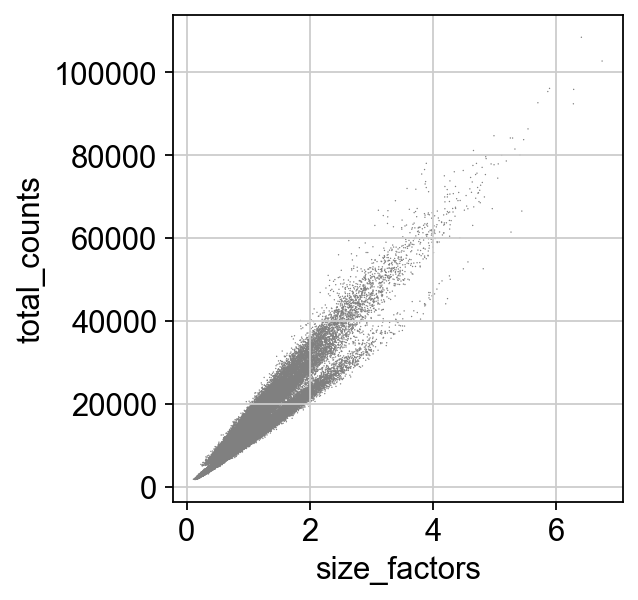

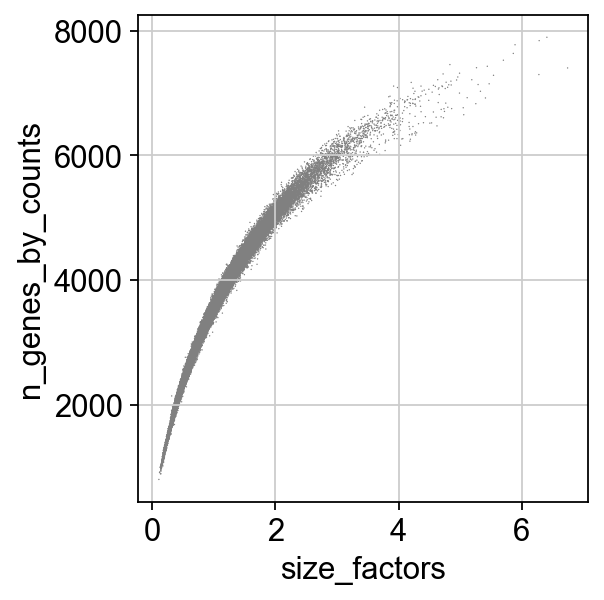

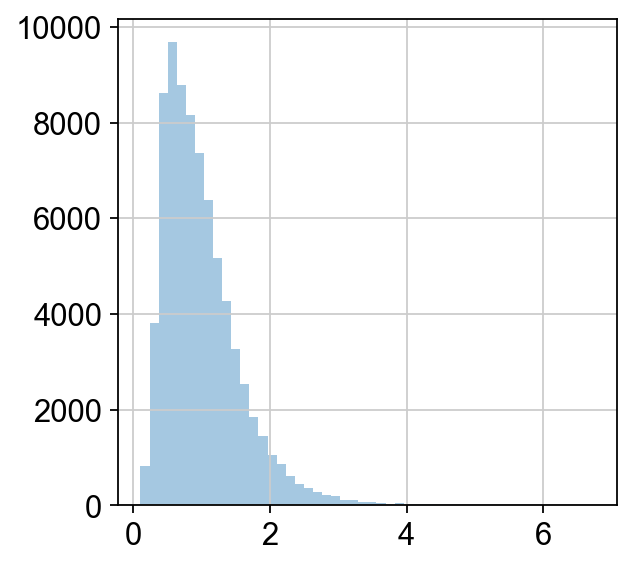

In [26]:
adata.obs['size_factors'] = size_factors

sc.pl.scatter(adata, 'size_factors', 'total_counts')
sc.pl.scatter(adata, 'size_factors', 'n_genes_by_counts')

sb.distplot(size_factors, bins=50, kde=False)
plt.show()

adata.layers["raw_counts"] = adata.X.copy()

adata.X /= adata.obs['size_factors'].values[:,None]
sc.pp.log1p(adata)

adata.layers['scran_norm'] = adata.X.copy()

In [27]:
adata.raw = adata

- remove rpl, mt genes 

In [28]:
rps = ['Rpl3', 'Rpl4', 'Rpl5', 'Rpl6', 'Rpl7', 'Rpl7a', 'Rpl8', 'Rpl9',
       'Rpl10', 'Rpl10a', 'Rpl11', 'Rpl12', 'Rpl13', 'Rpl13a', 'Rpl14',
       'Rpl15', 'Rpl17', 'Rpl18', 'Rpl18a', 'Rpl19', 'Rpl21', 'Rpl22',
       'Rpl23', 'Rpl23a', 'Rpl24', 'Rpl26', 'Rpl27', 'Rpl27a', 'Rpl28',
       'Rpl29', 'Rpl30', 'Rpl31', 'Rpl32', 'Rpl34', 'Rpl35', 'Rpl35a',
       'Rpl36', 'Rpl44', 'Rpl37', 'Rpl37a', 'Rpl38', 'Rpl39', 'Rpl40',
       'Rpl41', 'Rplp0', 'Rplp1', 'Rplp2', 'Rpsa', 'Rps2', 'Rps3',
       'Rps3a', 'Rps4x', 'Rps5', 'Rps6', 'Rps7', 'Rps8', 'Rps9', 'Rps10',
       'Rps11', 'Rps12', 'Rps13', 'Rps14', 'Rps15', 'Rps15a', 'Rps16',
       'Rps17', 'Rps18', 'Rps19', 'Rps20', 'Rps21', 'Rps23', 'Rps24',
       'Rps25', 'Rps26', 'Rps27', 'Rps27a', 'Rps28', 'Rps29', 'Rps30','Rps27rt','Rps12-ps3','Rpl10-ps3',
'Rpl39l',
'Rpl7a-ps5',
'Rpl36-ps4',
'Rpl9-ps6',
'Rpl13a-ps1',
      'Rpl9-ps1']

mt_genes = list(adata[:,adata.var['mt']==True].var_names)

In [29]:
adata = adata[:,~adata.var_names.isin(rps)]

adata = adata[:,~adata.var_names.isin(mt_genes)]


In [30]:
adata.shape

(76894, 21809)

In [31]:
sc.pp.filter_genes(adata,min_cells=10)

sc.pp.highly_variable_genes(adata, n_top_genes=5000)

filtered out 1739 genes that are detected in less than 10 cells


Trying to set attribute `.var` of view, copying.


If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:28)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [34]:
adata.write("post_scran_norm_rpl_mt_removal_filter_less_10_genes_hvgs_chkpt1.h5ad")

In [5]:
adata = sc.read("post_scran_norm_rpl_mt_removal_filter_less_10_genes_hvgs_chkpt1.h5ad")

In [6]:
samp_all = []
for entry in adata.obs_names:
    if 'maehr' in entry:
        samp_all.append(entry.split('|')[1]) # alternatively can use orig.ident
    else:
        samp_all.append(list(adata[entry,:].obs['sample'])[0])

In [7]:
len(samp_all)

76894

In [8]:
adata.obs['samp_all'] = samp_all

In [9]:
adata.obs['samp_all'].value_counts()

CR_pharynx_E11_5_rep3-maehr                        7967
CR_pharynx_E9_5_rep2-maehr                         7611
CR_pharynx_E12_5_rep2-maehr                        6201
CR_pharynx_E9_5_rep1-maehr                         5734
E8_75_Definitive_endoderm__GFP-__GSM3494358        5692
CR_pharynx_E11_5_rep2-maehr                        5385
CR_pharynx_E12_5_rep1-maehr                        4885
CR_pharynx_E10_5_rep5-maehr                        4743
CR_pharynx_E10_5_rep7-maehr                        4248
CR_pharynx_E10_5_rep6-maehr                        4129
E5_5_Whole_embryo__GSM3494339                      3928
CR_pharynx_E11_5_rep2B-maehr                       3141
E8_75_Definitive_endoderm__GFP-__GSM3494357        3079
E5_5_Whole_embryo__GSM3494340                      2754
E7_5_Definitive_endoderm__GFP-__GSM3494350         1781
E5_5_Whole_embryo__GSM3494338                      1198
E7_5_Definitive_endoderm__GFP-__GSM3494349          833
E7_5_Definitive_endoderm__GFP-__GSM3494348      

In [12]:
sc.pp.combat(adata,key='samp_all')

... storing 'samp_all' as categorical


Standardizing Data across genes.

Found 28 batches

Found 0 numerical variables:
	

Fitting L/S model and finding priors

Finding parametric adjustments



/Users/LoboM/miniconda3/envs/sc-tutorial-0720/lib/python3.8/site-packages/scanpy/preprocessing/_combat.py:340: RuntimeWarning: divide by zero encountered in true_divide
  (abs(g_new - g_old) / g_old).max(), (abs(d_new - d_old) / d_old).max()


Adjusting data



In [13]:
adata.write("post_scran_norm_combat_samp_all_rpl_mt_removal_filter_less_10_genes_hvgs_chkpt2.h5ad")

In [5]:
adata = sc.read("post_scran_norm_combat_samp_all_rpl_mt_removal_filter_less_10_genes_hvgs_chkpt2.h5ad")

In [6]:
sc.pp.highly_variable_genes(adata, n_top_genes=5000)

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:01:09)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [7]:
cc_file = "../cell_cycle_genes_from_Mac_scanpy.txt"
cell_cycle = ['S','G2.M']
cc_genes = pd.read_table(cc_file, delimiter='\t')
s_genes = cc_genes['S'].dropna()
g2m_genes = cc_genes['G2.M'].dropna()

s_genes_mm = [gene.lower().capitalize() for gene in s_genes]
g2m_genes_mm = [gene.lower().capitalize() for gene in g2m_genes]

s_genes_mm_ens = adata.var_names[np.in1d(adata.var_names, s_genes_mm)]
g2m_genes_mm_ens = adata.var_names[np.in1d(adata.var_names, g2m_genes_mm)]

sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes_mm_ens, g2m_genes=g2m_genes_mm_ens)

calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    1522 total control genes are used. (0:02:02)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    1615 total control genes are used. (0:01:42)
-->     'phase', cell cycle phase (adata.obs)


In [10]:
adata = adata[:, adata.var.highly_variable]

In [11]:
# adata2 = adata.copy()
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt','S_score','G2M_score'])

regressing out ['total_counts', 'pct_counts_mt', 'S_score', 'G2M_score']


/Users/LoboM/miniconda3/envs/sc-tutorial-0720/lib/python3.8/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
... storing 'phase' as categorical


    finished (0:08:24)


In [12]:
sc.pp.pca(adata, n_comps=1500, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=1500
    finished (0:07:28)


In [19]:
adata.write("final_peer_maehr.h5ad")